Oliver W. Layton

Spring 2023

CS443: Bio-Inspired Machine Learning

## Hebbian learning rule (vanilla)

#### Hebbian learning network with one output neuron

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(['seaborn-v0_8-colorblind', 'seaborn-v0_8-darkgrid'])
plt.show()
plt.rcParams.update({'font.size': 18})

np.set_printoptions(suppress=True, precision=3)

%load_ext autoreload
%autoreload 2

In [24]:
def fit_hebb(x, lr=0.01, epochs=150, verbose=True):
    '''Train Hebbian network with one output neuron on data samples (using Hebb's Rule) and learning rate of `lr`.

    Parameters:
    -----------
    data: ndarray. shape=(N, M).
        Data samples
    lr: float.
        Learning rate for the weight update
    epochs: int.
        Number of epochs to train
    verbose: bool.
        Whether we print out training info

    Returns:
    -----------
    wts. ndarray. shape=(M,).
        The learned network weights
    '''
    # Pull out number of data samples and features
    N, M = x.shape

    # Initialize weights randomly, centered at 0
    wt_scale = 0.1
    wts = wt_scale*np.random.random(size=(M,)) - wt_scale/2

    print('Initial weights:\n', wts)

    # Train for `epochs`, SGD-style
    for e in range(epochs):
        # Assume B = 1, aka SGD style learning
        for i in range(N):
            # Grab sample i.
            xi = x[i]
            # shape (xi) = (2,)
            
            # netIn
            net_in = xi @ wts
            # netAct: shape=scalar
            net_act = net_in
            
            # Update wts via Hebb's rule
            # shape=(2,) * scalar -> (2,)
            d_wts = lr*xi*net_act
            wts += d_wts
#             wts = wts / np.linalg.norm(wts)

    return wts


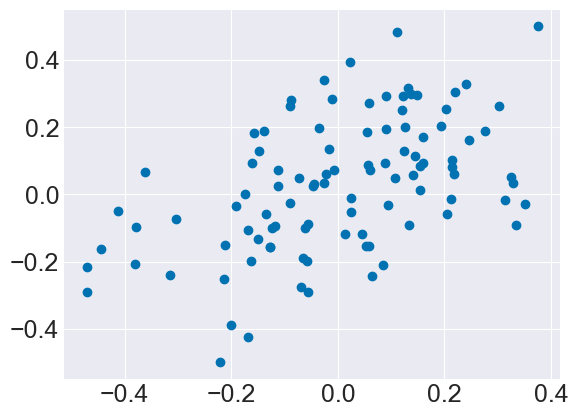

In [19]:
# Set random seed for reproduceability
np.random.seed(0)

# Define data as multivariate Gaussian blob
mu = [0, 0]
sigma = np.array([[3, 1.5],
                    [1.5, 3]])
data = np.random.multivariate_normal(mu, sigma, size=100)

# Normalize globally to range [-0.5, 0.5]
data = (data - np.min(data)) / (np.max(data) - np.min(data))
data = data - 0.5

plt.plot(data[:, 0], data[:, 1], 'o')
plt.show()

In [25]:
# Train the Hebbian neural network, get the final weights
wts = fit_hebb(data, epochs=150)
print('Learned wts\n', wts)

Initial weights:
 [-0.022  0.009]
Learned wts
 [-0.685 -0.728]


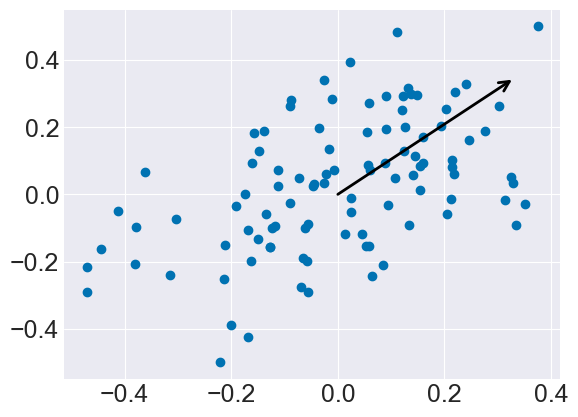

In [7]:
# Draw learned wts vector
vectorScale = 0.005
plt.plot(data[:, 0], data[:, 1], 'o')
ax = plt.gca()
ax.annotate('', vectorScale*wts, [0, 0],
            arrowprops=dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0))
plt.show()

In [14]:
# Compare with 1st principal component vector
dataC = data - np.mean(data, axis=0)
covMat = dataC.T @ dataC / (len(dataC) - 1)
e_vals, e_vecs = np.linalg.eig(covMat)
print('Learned wts\n', wts)
print('1st PC vector\n', -e_vecs[:, 1])

Learned wts
 [0.692 0.722]
1st PC vector
 [0.692 0.721]
